# 📘 SageMath Interactive Tutorial

This notebook expands **tutorial.md** with richer examples and runnable SageMath code.  

## 1 ✏️ Assignment & Exact Arithmetic

In this section we demonstrate assignment, exact rationals, floats, the underscore `_`, and basic type inspection.

### 1.1 Assign and Compare

In [1]:
b = 7/5                # assignment of a rational number
b == 7/5               # equality test (expect True)

True

### 1.2 The `_` Underscore

The underscore holds **the last printed output**.  We just evaluated `b == 7/5`, so `_` should be `True`.

In [2]:
_

True

### 1.3 Exact vs Floating Point

In [3]:
exact = 2/7            # exact rational
flt   = 2/7.0          # floating‑point approximation
exact, type(exact), flt, type(flt)

(2/7,
 <class 'sage.rings.rational.Rational'>,
 0.285714285714286,
 <class 'sage.rings.real_mpfr.RealNumber'>)

Multiplying by `7` shows the difference—no rounding for the rational, small error for the float:

In [4]:
exact*7, flt*7

(2, 2.00000000000000)

### 1.4 Exponentiation & Constants

In [5]:
power1 = 5^8           # caret
power2 = 5**8          # python-style
constants = (pi.n(30), e^pi, I^2)
(power1, power2, constants)

(390625, 390625, (3.1415927, e^pi, -1))

## 2 ➕ Basic Arithmetic Operators

Run the next cell to see each operator in action.

In [6]:
add      = 12 + 15
subtract = 50 - 19
multiply = 9 * 14
div_r    = 22/5        # rational
div_f    = 22/5.0      # float
floor_d  = 22//5
exp      = 4^5
mod      = 29 % 6
(add, subtract, multiply, div_r, div_f, floor_d, exp, mod)

(27, 31, 126, 22/5, 4.40000000000000, 4, 1024, 5)

## 3 🧮 Symbolic Algebra

### 3.1 Declare Symbols

We declare symbolic variables and define a physically motivated expression: the range of a projectile fired from ground level with initial speed $v$ at angle $\theta$ under gravity $g$.

$\displaystyle R(\theta) = \frac{v^2 \sin 2\theta}{g}$

In [7]:
theta, v, g = var('theta v g')
R = v^2 * sin(2*theta) / g
show(R)

v^2*sin(2*theta)/g

What launch angle maximizes the range? Differentiate $R(\theta)$ with respect to $\theta$ and solve $R'(\theta)=0$.

In [8]:
dR = diff(R, theta)
opt_angle = solve(dR == 0, theta)
opt_angle

[theta == 1/4*pi]

### 3.2 Manipulate Expressions

Below we demonstrate expansion, factorization, and numerical evaluation on a cubic expression.

In [9]:
x = var('x')
expr = (x - 2)*(x - 3)*(x + 1)
expanded = expand(expr)
factored = factor(expanded)
simplified = (sin(x)^2 + cos(x)^2).simplify()
subs_num = expanded.subs(x=1.5).n()
(expanded, factored, simplified, subs_num)

(x^3 - 4*x^2 + x + 6,
 (x + 1)*(x - 2)*(x - 3),
 cos(x)^2 + sin(x)^2,
 1.87500000000000)

### 3.3 Solving Equations — Exact vs Numerical

We solve a cubic equation exactly, then tackle a transcendental equation numerically.

In [10]:
# Exact roots of x^3 - 6x^2 + 11x - 6 = 0
roots_exact = solve(x^3 - 6*x^2 + 11*x - 6 == 0, x)

# Numeric solution of cos(x) = x
g = cos(x) - x
root_numeric = find_root(g, 0, 1)
(roots_exact, root_numeric)

([x == 1, x == 2, x == 3], 0.7390851332151559)

## 3.4 Calculus — Differentiation & Integration

Consider $f(x) = e^{x^2}\cos x$.  We'll compute derivatives and a definite integral numerically.

In [11]:
reset()

In [12]:
x = var('x')
f = exp(x^2) * cos(x)  
f1 = diff(f, x)
f2 = diff(f, x, 2)
int_exact = integrate(f, (x, 0, 1))         # might be symbolic
int_numeric = N(int_exact)
(f1.simplify(), f2.simplify(), int_numeric)

(2*x*cos(x)*e^(x^2) - e^(x^2)*sin(x),
 4*x^2*cos(x)*e^(x^2) - 4*x*e^(x^2)*sin(x) + cos(x)*e^(x^2),
 1.16570458514255)

## 3.5 Solving Differential Equations

We explore symbolic, Laplace‑transform, and numerical solutions.

### 3.5.1 Symbolic — Logistic Growth

Logistic ODE: $\displaystyle \frac{dy}{dt}=r\,y\Bigl(1-\frac{y}{K}\Bigr)$ with $y(0)=y_0$.

In [13]:
reset()

In [14]:
# Logistic ODE  y' = r y (1 - y / K)     with y(0) = K/10
reset()                     # clear any stray definitions

t  = var('t')               # time
y  = function('y')(t)       # unknown function y(t)
r, K = var('r K')           # positive parameters

ode  = diff(y, t) == r*y*(1 - y/K)

# a) General symbolic solution (no ICs) ────────────────────────────
sol_general = desolve(ode, y, ivar=t)
show(sol_general)

# b) Particular solution with numeric parameters and ICs ───────────
r_val = 0.7;  K_val = 12
ode_num = ode.subs({r: r_val, K: K_val})
ics     = [0, K_val/10]            

sol_IVP = desolve(ode_num, y, ivar=t, ics=ics)
show(sol_IVP)

-(log(-K + y(t)) - log(y(t)))/r == _C + t

-10/7*log(y(t) - 12) + 10/7*log(y(t)) == -10/7*I*pi + t - 10/7*log(54/5) + 10/7*log(6/5)

### 3.5.2 Laplace Transform Method

Solve $y'' - 3y' + 2y = e^{2t}$ with $y(0)=0, y'(0)=1$ via Laplace.

In [15]:
reset()

In [16]:

t = var('t')
y = function('y')(t)

ode   = diff(y, t, 2) - 3*diff(y, t) + 2*y == exp(2*t)
ics   = [0, 0, 1]              # t=0,  y=0,  y' = 1

sol = desolve(ode, y, ivar=t, ics=ics)   # plain desolve, not Laplace
show(sol)
                             

(t - 1)*e^(2*t) + e^(2*t)

### 3.5.3 Numerical IVP — Simple Pendulum (small angle)

System: $\theta' = \omega$, $\omega' = -\sin\theta$. We integrate with `desolve_odeint`.

In [17]:
reset()

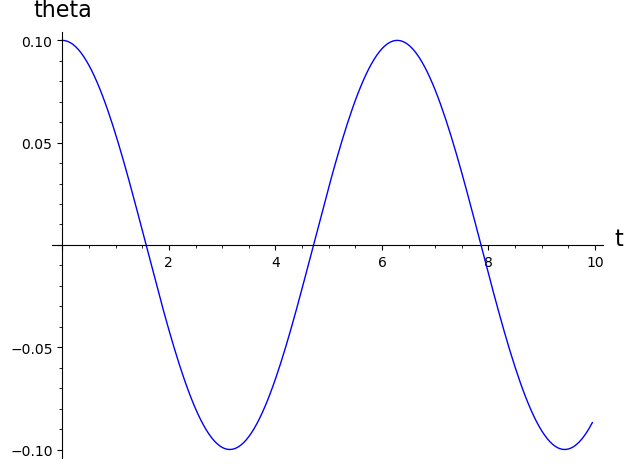

In [18]:
# 1 · Declare dependent variables (just symbols, not functions of t)
theta, omega = var('theta omega')

# 2 · RHS of the system written symbolically
rhs = [omega, -sin(theta)]          # [θ', ω']

# 3 · Initial conditions and time grid
y0 = [0.1, 0]                       # initial θ, ω
ts = srange(0, 10, 0.05)

# 4 · Numerical integration with odeint
sol = desolve_odeint(rhs, y0, ts, dvars=[theta, omega])

# 5 · Plot θ(t)
list_plot([(ts[i], sol[i][0]) for i in range(len(ts))],
          plotjoined=True, axes_labels=['t', 'theta'])


### 3.5.4 Euler’s Method — Predator–Prey System

Lotka–Volterra equations:


\begin{cases}
x' = \alpha x - \beta xy,\\[4pt]
y' = \delta xy - \gamma y,
\end{cases}


with $\alpha=\beta=\gamma=\delta=1$, $x(0)=2$, $y(0)=1$.  
We approximate with Euler steps.

In [19]:
reset()

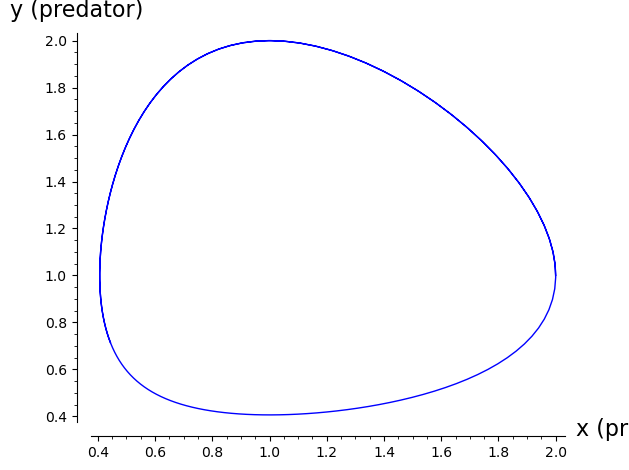

In [21]:

# 1 · Parameters and symbolic variables
alpha = beta = gamma = delta = 1
x, y   = var('x y')                     # prey  x(t), predator  y(t)

# 2 · Right‑hand sides
rhs = [alpha*x - beta*x*y,              #  x' = αx − βxy
       delta*x*y - gamma*y]             #  y' = δxy − γy

# 3 · Initial conditions and time mesh
y0  = [2, 1]                            # x(0)=2 , y(0)=1
ts  = srange(0, 10, 0.05)

# 4 · Numerical integration
sol = desolve_odeint(rhs, y0, ts, dvars=[x, y])

# 5 · Phase‑plane plot  (prey vs predator)
pts  = [(sol[i][0], sol[i][1]) for i in range(len(ts))]
list_plot(pts, plotjoined=True,
          axes_labels=['x (prey)', 'y (predator)'])
